In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre

In [2]:
datafile = u"/root/LR_ML/newData3.xlsx"
TIP0 = pd.read_excel(datafile)

In [3]:
TIP = pd.DataFrame(TIP0)

In [4]:
TIP.head()

,SBPI,SBPL,DBPI,DBPL,BPMI,BPML,LOP,NOTE
0,133,139,85,87,83,87,145.0,NaN
1,135,128,89,82,92,96,140.0,NaN
2,113,104,64,63,70,69,125.0,NaN
3,116,118,73,62,72,74,120.0,NaN
4,105,100,68,70,85,82,110.0,NaN


In [5]:
modTIP = TIP.drop(['NOTE'], axis = 1)
modTIP1 = pre.MinMaxScaler(feature_range=(0, 1))
modTIP2 = modTIP1.fit_transform(modTIP.drop(['LOP'], axis = 1))
print("\nMin max scaled data:\n", modTIP2)
modTIP3 = pd.DataFrame(modTIP2, columns = ['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'])
modTIP3['LOP'] = TIP['LOP']



Min max scaled data:
 [[0.89189189 0.88636364 0.65       0.86111111 0.5625     0.72727273]
 [0.94594595 0.63636364 0.75       0.72222222 0.84375    1.        ]
 [0.35135135 0.09090909 0.125      0.19444444 0.15625    0.18181818]
 [0.43243243 0.40909091 0.35       0.16666667 0.21875    0.33333333]
 [0.13513514 0.         0.225      0.38888889 0.625      0.57575758]
 [0.86486486 0.59090909 0.225      0.69444444 0.28125    0.39393939]
 [0.37837838 0.18181818 0.075      0.22222222 0.625      0.60606061]
 [0.27027027 0.31818182 0.275      0.16666667 0.15625    0.66666667]
 [0.         0.34090909 0.125      0.13888889 0.375      0.        ]
 [0.32432432 0.13636364 0.         0.         0.90625    0.06060606]
 [0.37837838 0.34090909 0.125      0.25       0.34375    0.36363636]
 [0.18918919 0.18181818 0.125      0.22222222 0.46875    0.60606061]
 [0.37837838 0.52272727 0.3        0.47222222 0.5625     0.45454545]
 [0.40540541 0.20454545 0.3        0.47222222 0.09375    0.06060606]
 [0.3783783

             SBPI        SBPL       DBPI       DBPL       BPMI       BPML  \
count   25.000000   25.000000  25.000000  25.000000  25.000000  25.000000   
mean   117.040000  118.040000  73.320000  70.360000  80.640000  78.280000   
std      9.787237   12.377668  11.440862  10.181192   9.560683   9.774627   
min    100.000000  100.000000  59.000000  56.000000  65.000000  63.000000   
25%    112.000000  109.000000  64.000000  62.000000  74.000000  71.000000   
50%    114.000000  115.000000  70.000000  66.000000  80.000000  78.000000   
75%    125.000000  124.000000  84.000000  81.000000  85.000000  85.000000   
max    137.000000  144.000000  99.000000  92.000000  97.000000  96.000000   

              LOP  
count   25.000000  
mean   123.332000  
std     12.795693  
min     90.000000  
25%    119.200000  
50%    120.000000  
75%    135.000000  
max    145.000000  
SBPI    0
SBPL    0
DBPI    0
DBPL    0
BPMI    0
BPML    0
LOP     0
NOTE    0
dtype: int64
          SBPI      SBPL      DBP

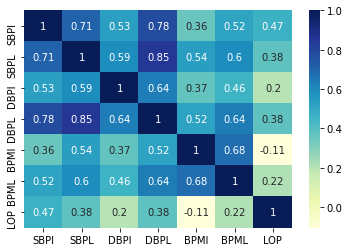

            SBPI       SBPL       DBPI       DBPL       BPMI       BPML  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean    0.460541   0.410000   0.358000   0.398889   0.488750   0.463030   
std     0.264520   0.281311   0.286022   0.282811   0.298771   0.296201   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.324324   0.204545   0.125000   0.166667   0.281250   0.242424   
50%     0.378378   0.340909   0.275000   0.277778   0.468750   0.454545   
75%     0.675676   0.545455   0.625000   0.694444   0.625000   0.666667   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

              LOP  
count   25.000000  
mean   123.332000  
std     12.795693  
min     90.000000  
25%    119.200000  
50%    120.000000  
75%    135.000000  
max    145.000000  
          SBPI      SBPL      DBPI      DBPL      BPMI      BPML       LOP
SBPI  1.000000  0.714705  0.531252  0.780114  0.357726  0.515993  0.4

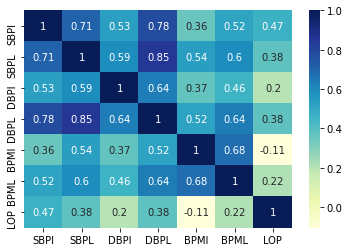

In [6]:
#檢驗數據
print(modTIP.describe())#數據描述，會顯示最值，平均數等信息，可以簡單判斷數據中是否有異常值
print(TIP[TIP.isnull()==True].count())#檢驗缺失值，若輸出爲0，說明該列沒有缺失值
#輸出相關係數，判斷是否值得做線性迴歸模型
print(modTIP.corr())#0-0.3弱相關；0.3-0.6中相關；0.6-1強相關；
sns.heatmap(modTIP.corr(),annot=True, cmap="YlGnBu")
# sns.pairplot(modTIP, x_vars=['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'], y_vars='LOP', height=7, aspect=0.8, kind='reg')
# plt.savefig(u"/root/LR_ML/modData_Sorted4_pairplot.png")
plt.show()
print(modTIP3.describe())
print(modTIP3.corr())
H = sns.heatmap(modTIP3.corr(),annot=True, cmap="YlGnBu")
#通過seaborn添加一條最佳擬合直線和95%的置信帶，直觀判斷相關關係
# P = sns.pairplot(modTIP3, x_vars=['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'], y_vars='LOP', height=7, aspect=0.8, kind='reg')
# F = H.get_figure()
# F.savefig(u"/root/LR_ML/modData_Sorted4_correlation.png")
# plt.savefig(u"/root/LR_ML/modData_Sorted4_pairplot_normalization.png")
plt.show()

自變量---源數據: (25, 5) ；  訓練集: (20, 5) ；  測試集: (5, 5)
因變量---源數據: (25,) ；  訓練集: (20,) ；  測試集: (5,)
擬合參數:截距 107.98545690812131 ,迴歸係數： [ 0.058655    0.06071164  0.50823788 -0.95082868  0.55928121]
最佳擬合線: Y =  107.99 + 0.06 * X1 +  0.51 * X2


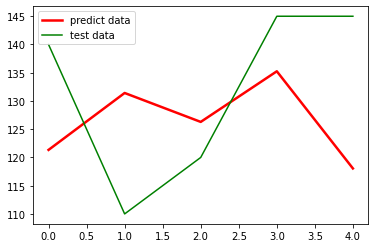

自變量---源數據: (25, 5) ；  訓練集: (20, 5) ；  測試集: (5, 5)
因變量---源數據: (25,) ；  訓練集: (20,) ；  測試集: (5,)
擬合參數:截距 122.96608789605142 ,迴歸係數： [ 20.00385959 -21.3630237   20.28162669 -13.45111571  -1.21813826]
最佳擬合線: Y =  122.97 + -21.36 * X1 +  20.28 * X2


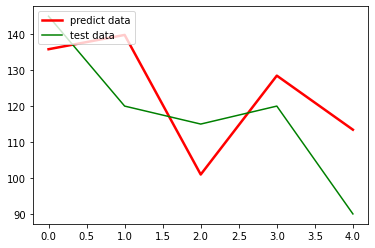

In [7]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.iloc[:,1:6],modTIP.LOP,train_size=0.8)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.iloc[:,1:6].shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",TIP.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#調用線性規劃包
model = LinearRegression()
model.fit(X_train,Y_train)#線性迴歸訓練
a  = model.intercept_#截距
b = model.coef_#迴歸係數
print("擬合參數:截距",a,",迴歸係數：",b)
#顯示線性方程，並限制參數的小數位爲兩位
print("最佳擬合線: Y = ",round(a,2),"+",round(b[1],2),"* X1 + ",round(b[2],2),"* X2")
Y_pred = model.predict(X_test)#對測試集數據，用predict函數預測
plt.plot(range(len(Y_pred)),Y_pred,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_test)),Y_test,'green',label="test data")
plt.legend(loc=2)
plt.show()#顯示預測值與測試值曲線

X_train1,X_test1,Y_train1,Y_test1 = train_test_split(modTIP3.iloc[:,1:6],modTIP.LOP,train_size=0.8)
print("自變量---源數據:",modTIP3.iloc[:,1:6].shape, "；  訓練集:",X_train1.shape, "；  測試集:",X_test1.shape)
print("因變量---源數據:",TIP.LOP.shape, "；  訓練集:",Y_train1.shape, "；  測試集:",Y_test1.shape)
model1 = LinearRegression()
model1.fit(X_train1,Y_train1)
c  = model1.intercept_
d = model1.coef_
print("擬合參數:截距",c,",迴歸係數：",d)
print("最佳擬合線: Y = ",round(c,2),"+",round(d[1],2),"* X1 + ",round(d[2],2),"* X2")
Y_pred1 = model1.predict(X_test1)
plt.plot(range(len(Y_pred1)),Y_pred1,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_test1)),Y_test1,'green',label="test data")
plt.legend(loc=2)
# plt.savefig(u"/root/LR_ML/modData_Sorted4_evaluation.png")
plt.show()